In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(plt)

<module 'matplotlib.pyplot' from 'C:\\Users\\karun\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\matplotlib\\pyplot.py'>


In [13]:
import chardet

# Detect the encoding
with open("C:/Users/karun/Downloads/Bharth intern/spam.csv", 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']

# Read the CSV using the detected encoding
spam = pd.read_csv("C:/Users/karun/Downloads/Bharth intern/spam.csv", encoding=encoding)


In [14]:
spam.shape

(5572, 5)

In [15]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
spam.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2805,ham,Can a not?,NaN,NaN,NaN
3328,ham,Sac will score big hundred.he is set batsman:-),NaN,NaN,NaN
4402,ham,Just getting back home,NaN,NaN,NaN
4498,spam,"SMS SERVICES. for your inclusive text credits,...",NaN,NaN,NaN
2419,spam,SMS SERVICES For your inclusive text credits p...,NaN,NaN,NaN
4500,ham,So wat's da decision?,NaN,NaN,NaN


In [17]:
#data cleaning 

spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [19]:
spam.sample(5)

,v1,v2
2395,ham,"Babe, I'm back ... Come back to me ..."
4871,ham,Hi dis is yijue i would be happy to work wif Ì...
3125,ham,U coming 2 pick me?
3506,ham,Two fundamentals of cool life: \Walk
3714,ham,"I am late,so call you tomorrow morning.take ca..."


In [20]:
spam.rename(columns={'v1':'type','v2':'text'},inplace=True)
spam.sample(3)

,type,text
3653,ham,Why i come in between you people
3217,ham,Don know:)this week i'm going to tirunelvai da.
1258,ham,Honey boo I'm missing u.


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
spam['type'] = encoder.fit_transform(spam['type'])
spam.head(5)

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
spam.isnull().sum()

type    0
text    0
dtype: int64

In [25]:
spam.duplicated().sum()

403

In [26]:
spam = spam.drop_duplicates(keep='first')

In [27]:
spam.duplicated().sum()

0

In [28]:
#Exploratory data Analysis
spam['type'].value_counts()

type
0    4516
1     653
Name: count, dtype: int64

In [29]:
print(plt)


<module 'matplotlib.pyplot' from 'C:\\Users\\karun\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\matplotlib\\pyplot.py'>


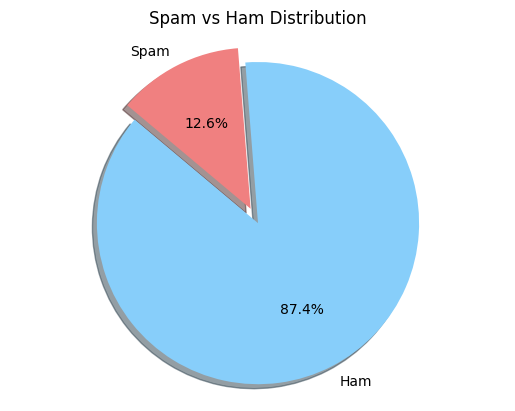

In [30]:
import matplotlib.pyplot as plt

labels = ['Ham', 'Spam']
sizes = [4516, 653]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Spam vs Ham Distribution')
plt.show()


In [31]:
import nltk
from nltk.tokenize import word_tokenize

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
spam['num_char'] = spam['text'].apply(len)

In [34]:
spam.sample(3)

,type,text,num_char
2397,0,Neshanth..tel me who r u?,25
1185,0,Annoying isn't it.,18
722,0,That is wondar full flim.,25


In [35]:
nltk.download('punkt')
spam['num_word'] = spam['text'].apply(lambda x: len(word_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
spam[['type','text','num_word']].sample(5)

,type,text,num_word
1860,0,"It could work, we'll reach a consensus at the ...",13
4398,0,Yes just finished watching days of our lives. ...,13
4308,0,He dint tell anything. He is angry on me that ...,17
1405,0,K..k..any special today?,8
3450,0,Yes we were outside for like 2 hours. And I ca...,25


In [37]:
from nltk.tokenize import sent_tokenize
spam['num_sent'] = spam['text'].apply(lambda x: len(sent_tokenize(x)))
spam.sample(5)



,type,text,num_char,num_word,num_sent
3568,0,She's fine. Sends her greetings,31,7,2
4525,1,"I want some cock! My hubby's away, I need a re...",163,44,5
3554,1,From next month get upto 50% More Calls 4 Ur s...,162,29,1
3397,0,It only does simple arithmetic not percentages.,47,8,1
442,0,Oic... I saw him too but i tot he din c me... ...,69,20,3


In [38]:
spam[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
spam[spam['type'] == 0][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
spam[spam['type'] == 1][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


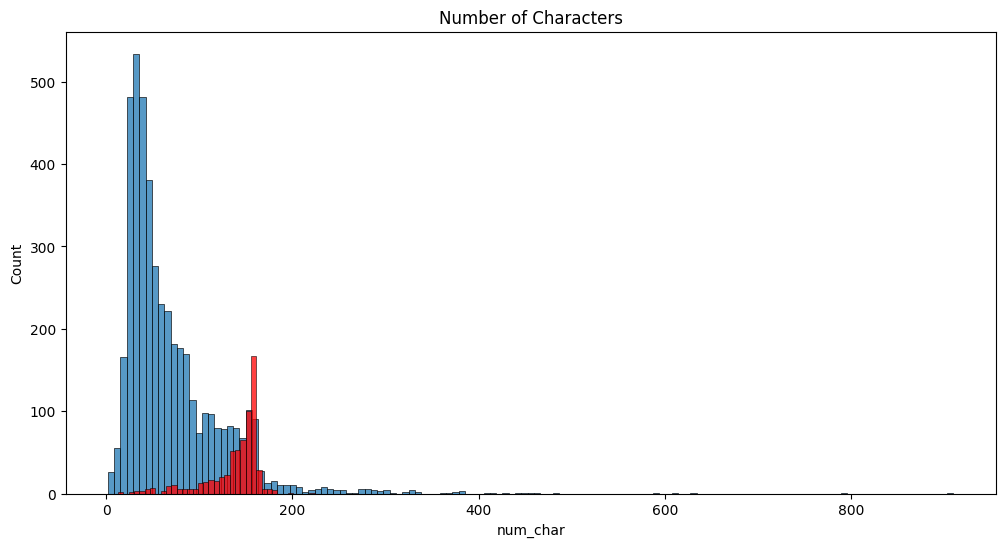

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(spam[spam['type']==0]['num_char'])
sns.histplot(spam[spam['type']==1]['num_char'],color='red')
plt.title("Number of Characters")
plt.show()

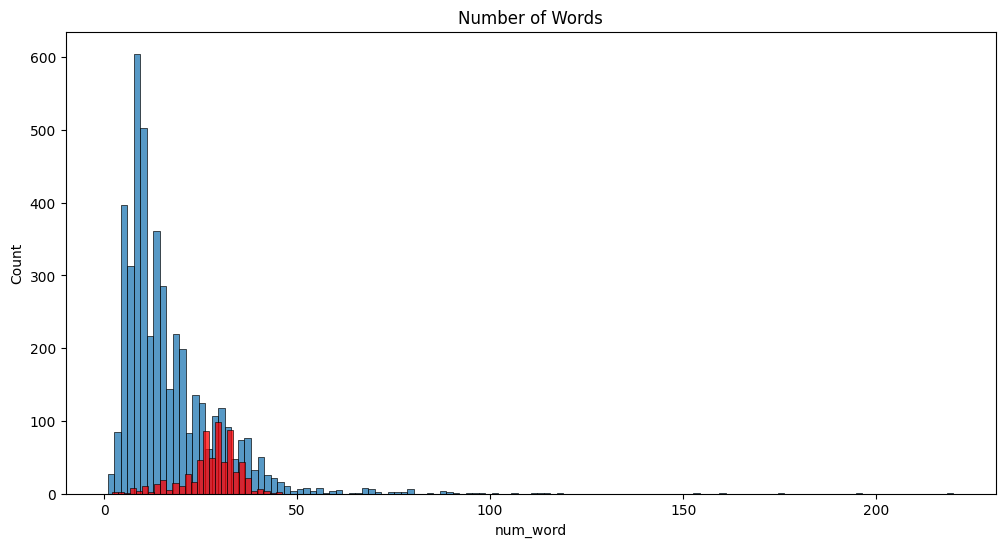

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(spam[spam['type']==0]['num_word'])
sns.histplot(spam[spam['type']==1]['num_word'],color='red')
plt.title("Number of Words")
plt.show()

<Figure size 1000x600 with 0 Axes>

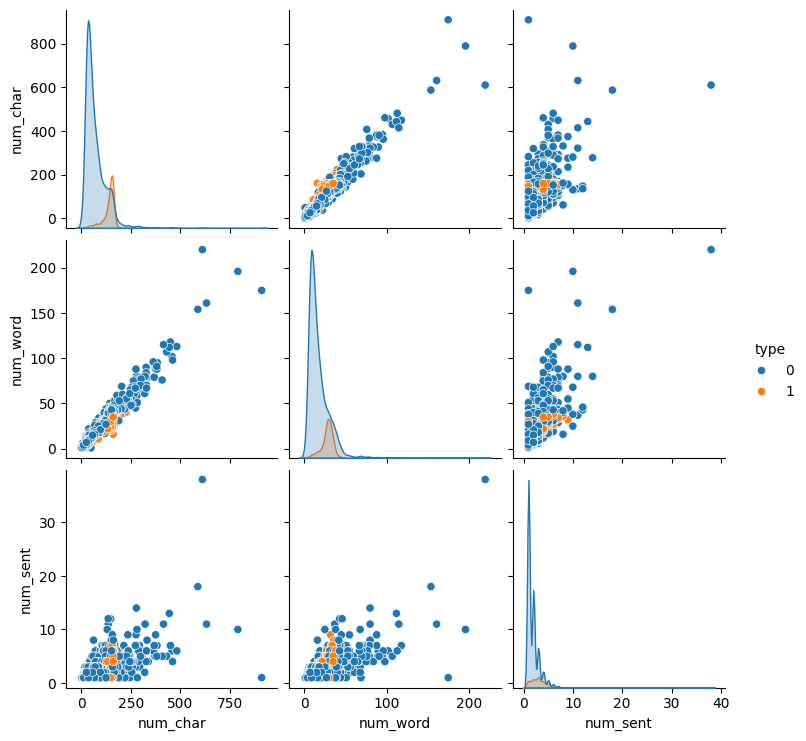

In [43]:
plt.figure(figsize=(10,6))
sns.pairplot(spam,hue='type')

In [44]:
print(spam)

      type                                               text  num_char  \
0        0  Go until jurong point, crazy.. Available only ...       111   
1        0                      Ok lar... Joking wif u oni...        29   
2        1  Free entry in 2 a wkly comp to win FA Cup fina...       155   
3        0  U dun say so early hor... U c already then say...        49   
4        0  Nah I don't think he goes to usf, he lives aro...        61   
...    ...                                                ...       ...   
5567     1  This is the 2nd time we have tried 2 contact u...       161   
5568     0              Will Ì_ b going to esplanade fr home?        37   
5569     0  Pity, * was in mood for that. So...any other s...        57   
5570     0  The guy did some bitching but I acted like i'd...       125   
5571     0                         Rofl. Its true to its name        26   

      num_word  num_sent  
0           24         2  
1            8         2  
2           37    

In [45]:
from nltk.corpus import stopwords
import nltk.downloader
from nltk.stem import PorterStemmer 
import string

ps = PorterStemmer()
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
transformed_text =transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)



i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today


In [47]:
spam['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [48]:
spam['transformed_text']= spam['text'].apply(transform_text)
spam.head()

,type,text,num_char,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


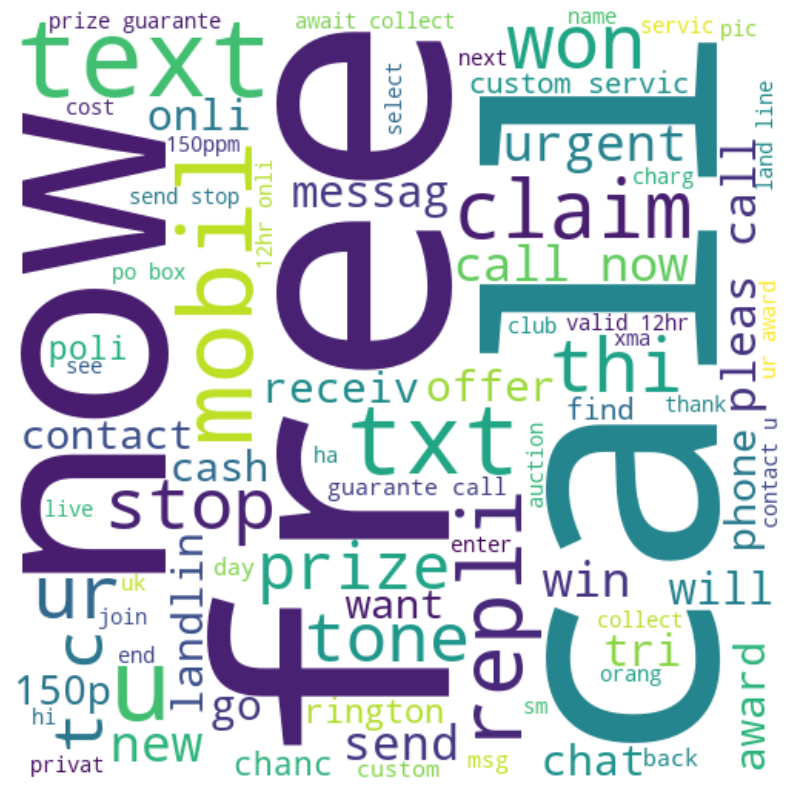

In [49]:
from wordcloud import WordCloud

# Create a WordCloud object with the correct class name
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

spam_wc = wc.generate(spam[spam['type']==1]['transformed_text'].str.cat(sep=" "))


# Display the word cloud using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


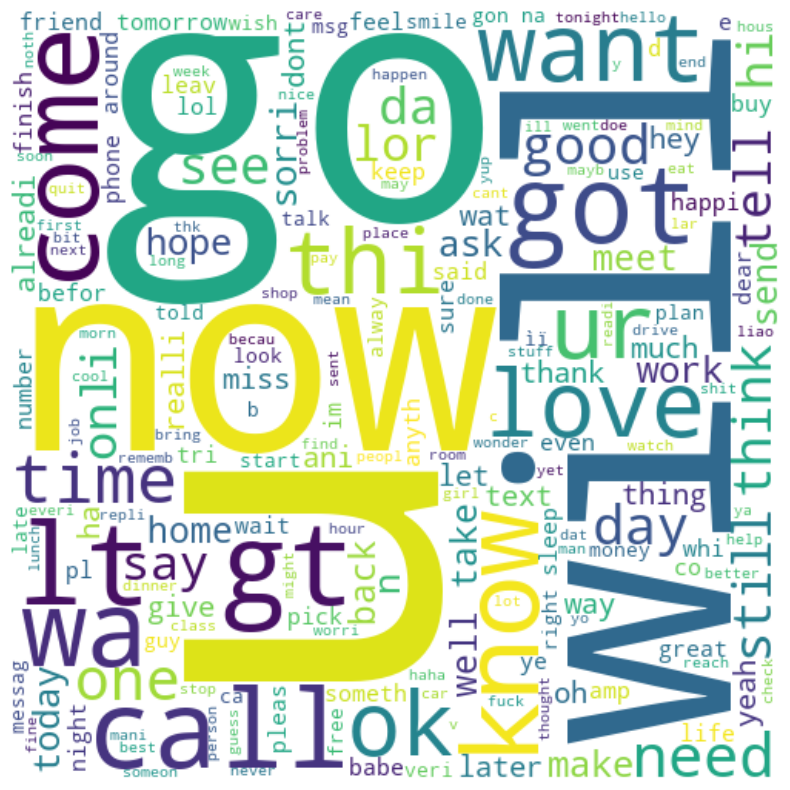

In [50]:
ham_wc = wc.generate(spam[spam['type']==0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(10, 10))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [51]:
spam_corpus = []
for msg in spam[spam['type']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

14475

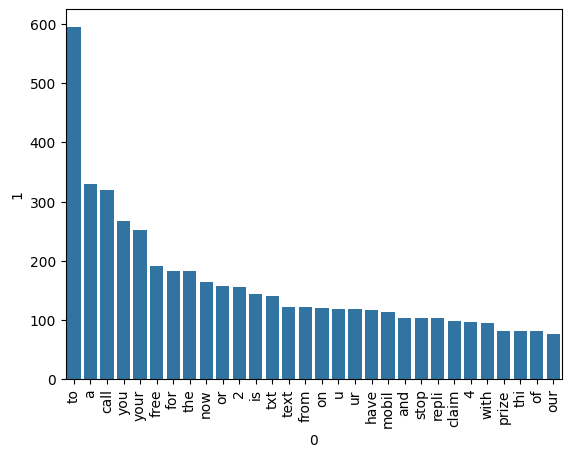

In [53]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
ham_corpus = []
for msg in spam[spam['type']==1]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

14475

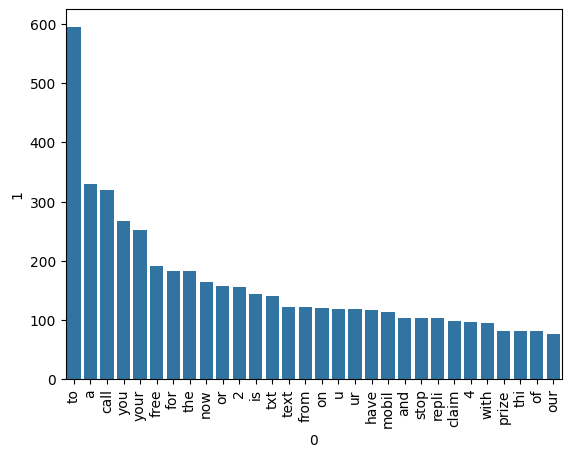

In [56]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
spam.head()

,type,text,num_char,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [58]:
#building the model

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tifdf = TfidfVectorizer(max_features=3000)

In [59]:
X = tifdf.fit_transform(spam['transformed_text']).toarray()

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [61]:
X =np.hstack((X,spam['num_char'].values.reshape(-1,1)))

In [62]:
X.shape

(5169, 3001)

In [63]:
y= spam['type'].values

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [68]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8936170212765957
[[801  95]
 [ 15 123]]
0.5642201834862385


In [69]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9787234042553191
[[892   4]
 [ 18 120]]
0.967741935483871


In [70]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9806576402321083
[[893   3]
 [ 17 121]]
0.9758064516129032


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators= 50,random_state=2)

In [73]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'Adab':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDC':gbdc,
    'XBG':xgb
}

In [74]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    percision = precision_score(Y_test,y_pred,zero_division=1)

    return accuracy,percision

In [75]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.8665377176015474, 1.0)

In [77]:
from sklearn.metrics import accuracy_score, precision_score


def train_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, zero_division=1)
    return accuracy, precision

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    precision_scores.append(current_precision)
    accuracy_scores.append(current_accuracy)


For SVC
Accuracy - 0.8665377176015474
Precision - 1.0
For KN
Accuracy - 0.8926499032882012
Precision - 0.9655172413793104
For NB
Accuracy - 0.9787234042553191
Precision - 0.967741935483871
For DT
Accuracy - 0.9526112185686654
Precision - 0.9238095238095239
For LR
Accuracy - 0.9758220502901354
Precision - 0.959349593495935
For RF
Accuracy - 0.9748549323017408
Precision - 1.0


C:\Users\karun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For Adab
Accuracy - 0.97678916827853
Precision - 0.9453125
For BgC
Accuracy - 0.9738878143133463
Precision - 0.944
For ETC
Accuracy - 0.9796905222437138
Precision - 0.9834710743801653
For GBDC
Accuracy - 0.9545454545454546
Precision - 0.9595959595959596
For XBG
Accuracy - 0.9816247582205029
Precision - 0.976


In [81]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Percision':precision_scores}).sort_values('Percision',ascending=False)

performance_df

,Algorithm,Accuracy,Percision
0,SVC,0.866538,1.000000
5,RF,0.974855,1.000000
8,ETC,0.979691,0.983471
10,XBG,0.981625,0.976000
2,NB,0.978723,0.967742
1,KN,0.892650,0.965517
9,GBDC,0.954545,0.959596
4,LR,0.975822,0.959350
6,Adab,0.976789,0.945312
7,BgC,0.973888,0.944000


In [82]:
performance_df1= pd.melt(performance_df , id_vars= "Algorithm")

performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.866538
1,RF,Accuracy,0.974855
2,ETC,Accuracy,0.979691
3,XBG,Accuracy,0.981625
4,NB,Accuracy,0.978723
5,KN,Accuracy,0.892650
6,GBDC,Accuracy,0.954545
7,LR,Accuracy,0.975822
8,Adab,Accuracy,0.976789
9,BgC,Accuracy,0.973888


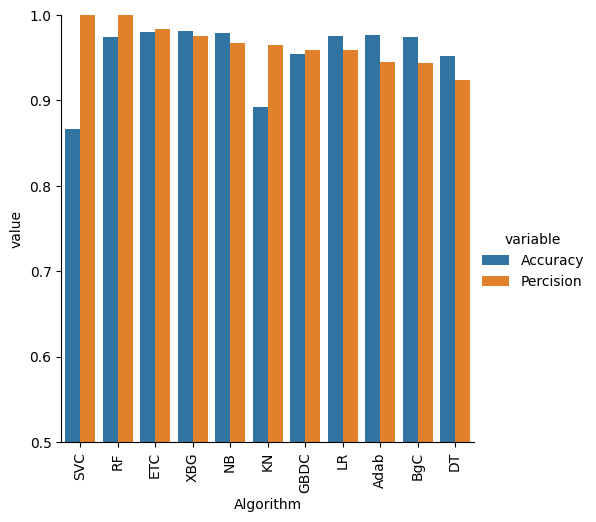

In [83]:
sns.catplot(x='Algorithm',y='value',
            hue='variable',data=performance_df1, kind= 'bar',height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation= 'vertical')
plt.show()


In [84]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Percision_max_ft_3000':precision_scores}).sort_values('Percision_max_ft_3000',ascending=False)

In [85]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [86]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Percision_num_chars':precision_scores}).sort_values('Percision_num_chars',ascending=False)

In [88]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Percision,Accuracy_max_ft_3000_x,Percision_max_ft_3000_x,Accuracy_max_ft_3000_y,Percision_max_ft_3000_y,Accuracy_num_chars,Percision_num_chars
0,SVC,0.866538,1.000000,0.866538,1.000000,0.866538,1.000000,0.866538,1.000000
1,RF,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000
2,ETC,0.979691,0.983471,0.979691,0.983471,0.979691,0.983471,0.979691,0.983471
3,XBG,0.981625,0.976000,0.981625,0.976000,0.981625,0.976000,0.981625,0.976000
4,NB,0.978723,0.967742,0.978723,0.967742,0.978723,0.967742,0.978723,0.967742
5,KN,0.892650,0.965517,0.892650,0.965517,0.892650,0.965517,0.892650,0.965517
6,GBDC,0.954545,0.959596,0.954545,0.959596,0.954545,0.959596,0.954545,0.959596
7,LR,0.975822,0.959350,0.975822,0.959350,0.975822,0.959350,0.975822,0.959350
8,Adab,0.976789,0.945312,0.976789,0.945312,0.976789,0.945312,0.976789,0.945312
9,BgC,0.973888,0.944000,0.973888,0.944000,0.973888,0.944000,0.973888,0.944000


In [89]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [90]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [91]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [92]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("percision",precision_score(Y_test,y_pred))

Accuracy 0.9777562862669246
percision 1.0


In [93]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [94]:
from sklearn.ensemble import StackingClassifier

In [95]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [96]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Percision",precision_score(Y_test,y_pred))

Accuracy 0.9816247582205029
Percision 0.9541984732824428


In [99]:
import pickle
pickle.dump(tifdf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


In [100]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train = ["Sample text 1","Sample text 2","Sample text 3"]
Y_train = [0, 1, 0]

tfidf = TfidfVectorizer(lowercase=True,stop_words= 'english')
X_train_tfidf =tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf,Y_train)

with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)

with open('model.pkl','wb') as model_file:
    pickle.dump(mnb,model_file)

In [102]:
print(st)

NameError: name 'st' is not defined